<font color='blue'> Привет. Извини за долгую проверку. Ниже мои комментарии выделены синим. </font>

# Аналитика в Яндекс.Афише

## Описание проекта
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:  
- лог сервера с данными о посещениях сайта Яндекс.Афиши,  
- выгрузка всех заказов за этот период,  
- статистика рекламных расходов.  
Вы изучите:  
- как люди пользуются продуктом,  
- когда они начинают покупать,   
- сколько денег приносит каждый клиент,  
- когда клиент окупается.  


### Инструкция по выполнению проекта:

#### Шаг 1. Загрузите данные и подготовьте их к анализу  
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам: `/datasets/visits_log.csv` `/datasets/orders_log.csv` `/datasets/costs.csv`

#### Шаг 2. Постройте отчёты и посчитайте метрики   

`Продукт`  
- Сколько людей пользуются в день, неделю, месяц?  
- Сколько сессий в день?  
- Сколько длится одна сессия?  
- Как часто люди возвращаются?  

`Продажи`  
- Когда люди начинают покупать?  
- Сколько раз покупают за период?  
- Какой средний чек?  
- Сколько денег приносят? (LTV)  

`Маркетинг`  
- Сколько денег потратили? Всего / на каждый источник / по времени   
- Сколько стоило привлечение одного покупателя из каждого источника?  
- На сколько окупились расходы? (ROI)  
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

#### Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
Какие источники/платформы вы бы порекомендовали?   
Объясните свой выбор: 
-  на какие метрики вы ориентируетесь?  
- Почему?  
- Какие выводы вы сделали, узнав значение метрик?

### Описание данных
Таблица `visits` (лог сервера с информацией о посещениях сайта):  
- Uid — уникальный идентификатор пользователя  
- Device — категория устройства пользователя  
- Start Ts — дата и время начала сессии   
- End Ts — дата и время окончания сессии  
- Source Id — идентификатор рекламного источника, из которого пришел пользователь  

Таблица `orders` (информация о заказах):  
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

Таблица `costs` (информация о затратах на маркетинг):  
- source_id — идентификатор рекламного источника  
- dt — дата  
- costs — затраты на этот рекламный источник в этот день

#### Шаг 1. Загрузите данные и подготовьте их к анализу    
Импортируем нужные для работы библиотеки

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Как видно выше, необходимо привести к соответствующему формату даты в столбцах `End Ts` и `Start Ts`

In [4]:
visits['End Ts'] =  pd.to_datetime(visits['End Ts'])
visits['Start Ts'] =  pd.to_datetime(visits['Start Ts'])

Переименуем названия столбцов `End Ts` и `Start Ts` в одно слово

In [5]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'end ts':'end_ts', 'start ts': 'start_ts', 'source id': 'source_id'})

In [6]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Как видно выше, необходимо привести к соответствующему формату даты в столбцах `Buy Ts`

In [8]:
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

Переименуем названия столбца `Buy Ts` в одно слово

In [9]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'buy ts':'buy_ts'})

In [10]:
costs = pd.read_csv('/datasets/costs.csv')
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [11]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Как видно выше, необходимо привести к соответствующему формату даты в столбцах `dt`

In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])

<font color='blue'> Хорошо, данные готовы к анализу. </font>

#### Шаг 2. Постройте отчёты и посчитайте метрики   

`Продукт`  
- Сколько людей пользуются в день, неделю, месяц?  
- Сколько сессий в день?  
- Сколько длится одна сессия?   
- Как часто люди возвращаются?  

Чтобы посчитать дневное, недельное и месячное использование, выделим в отдельные столбцы год, месяц и неделю, а также полную дату.

In [13]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


In [14]:
product_customers_daily = visits.groupby('session_date')['uid'].nunique().mean()
int(product_customers_daily)

907

In [15]:
product_customers_weekly = visits.groupby(['session_year', 'session_week'])['uid'].nunique().mean()
int(product_customers_weekly)

5716

In [16]:
product_customers_month = visits.groupby(['session_year', 'session_month'])['uid'].nunique().mean()
int(product_customers_month)

23228

<font color='blue'> все верно рассчитано. </font>

### Продуктом пользуются:  
- в день - 907 человек  
- в неделю - 5716 человек  
- в месяц - 23228 человек

In [17]:
product_session = visits.groupby('session_date')['start_ts'].count().mean()
int(product_session)

987

### В день 987 сессий

In [18]:
product_session_duration_sec = (visits['end_ts'] - visits['start_ts']).dt.seconds.mean()
int(product_session_duration_sec)

643

Кажется, всё получилось. Однако взглянем на распределение:

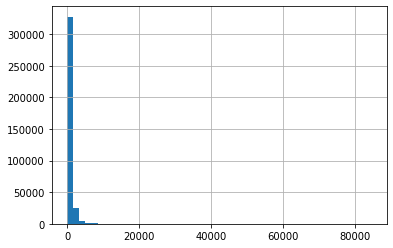

In [19]:
(visits['end_ts'] - visits['start_ts']).dt.seconds.hist(bins=50)

Когда распределение близко к нормальному или нормальное — можно смотреть на среднюю или медиану. Наше — не из таких, рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [20]:
(visits['end_ts'] - visits['start_ts']).dt.seconds.mode()

0    60
dtype: int64

<font color='blue'> Хорошо, сессии проанализированы верно. </font>

### Сессия длится в среднем 1 минуту

In [21]:
visits.head() # вспомним, что у нас в данных

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Для определения частоты возвратов людей посчитаем Churn Rate  
Сформируем месячные когорты и добавим столбец с когортами к датасету   
Определим дату первой сессии

In [22]:
first_activity_date = visits.groupby(['uid'])['session_date'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-27


Выделим месяц сессии `session_month` и месяц первой сессии `first_session_month` 

In [23]:
visits['first_session_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['session_month'] = visits['session_date'].astype('datetime64[M]')
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,first_activity_date,first_session_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,2018-03-09,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,2017-12-27,2017-12-01


Выделим в отдельный столбец **lifetime** когорт  
Посчитаем количество уникальных пользователей по когортам и по **lifetime**

In [24]:
# определим разницу между месяцем сессии и первым месяцом сессии 
visits['cohort_lifetime'] = visits['session_month'] - visits['first_session_month'] 
# переведем в формат месяца
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M') 
# округлим и отбросим дробные значения
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)
# посчитаем когорты - сгруппируем по когорте и lifetime, посчитаем количество уникальных пользователей
cohorts = visits.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
# определим сколько изначально было уникальных пользователей в каждой когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
# переименуем количество пользователей в cohort_users для последующего объединения таблиц
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
# объединим таблицы
cohorts = cohorts.merge(initial_users_count,on='first_session_month')

In [25]:
cohorts.head(10)

,first_session_month,cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
5,2017-06-01,5,947,13259
6,2017-06-01,6,809,13259
7,2017-06-01,7,766,13259
8,2017-06-01,8,694,13259
9,2017-06-01,9,674,13259


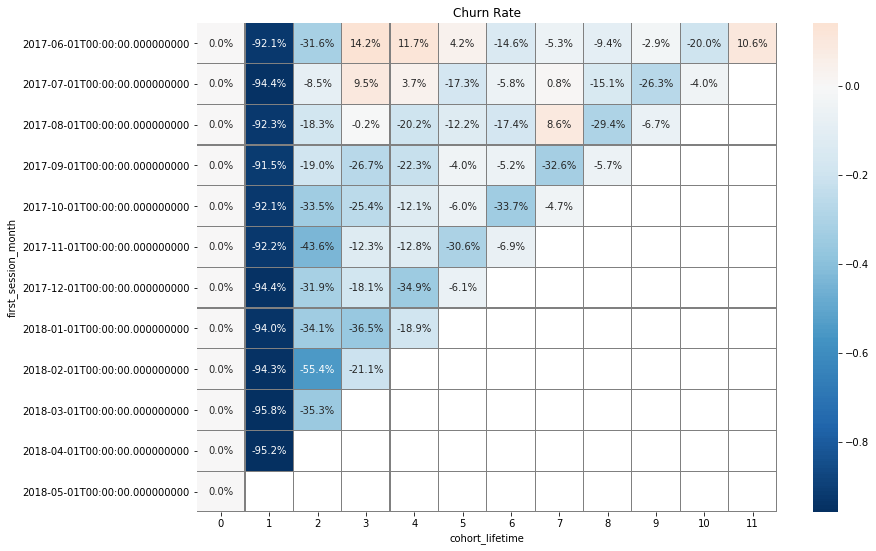

In [26]:
# посчитаем Churn Rate
cohorts['churn_rate'] = cohorts.groupby('first_session_month')['uid'].pct_change()
# Для визуализации Churn Rate подготовим сводную таблицу
# в строках будут когорты, столбцами будут lifetime, значениями - Churn Rate 
# для вывода нулевого значения lifetime используем aggfunc = 'sum'
churn_pivot = cohorts.pivot_table(
    index = 'first_session_month', 
    columns = 'cohort_lifetime', 
    values = 'churn_rate', 
    aggfunc = 'sum'
)
# визуализируем данные на тепловой карте heatmap библиотеки seaborn
plt.figure(figsize=(13, 9)) # размер графика
plt.title('Churn Rate') # название
sns.heatmap(
    churn_pivot, 
    annot=True, 
    fmt='.1%', 
    linewidths= 0.1, 
    linecolor='grey', 
    cmap = "RdBu_r", # определяем цветовую палитру
    center=0 # определяем точку смены цветовой палитры
)

<font color='blue'> Хорошо, хотя здесь скорее retention. churn обычно считают для сервисов с подпиской, абонентской платой и.т.д. </font>

### Люди возвращаются крайне редко   
- после первого месяца почти 90% от первоначального количества пользователей уходят (по всем когортам)
- в самой "старой" когорте `2017-06-01` на 3, 4, 5 и 11 месяцах после начала когорты люди возвращались  
- еще в двух когортах люди возвращались: `2017-07-01` (дважды) и `2017-08-01` (один раз) 
- во всех остальных не зафиксировано возвращения людей

`Продажи`  
- Когда люди начинают покупать?  
- Сколько раз покупают за период?  
- Какой средний чек?  
- Сколько денег приносят? (LTV)  

In [27]:
visits.head() # вспомним, что у нас в данных

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,first_activity_date,first_session_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,2018-03-09,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,52,2017-12-27,2017-12-27,2017-12-01,0


In [28]:
orders.head() # вспомним, что у нас в данных

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Переведем дату покупки в формат даты

In [29]:
orders['buy_date'] = orders['buy_ts'].dt.date
orders

,buy_ts,revenue,uid,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31


Создадим ноавый датасет `visits_new` для определения месяца первой сессии

In [30]:
visits_new = visits[['start_ts', 'uid', 'source_id', 'device']] # выберем нужные столбцы из оригинальной таблицы
first_visits_date = visits_new.groupby(['uid'])['start_ts'].min() # определим первый заход по каждому пользователю
first_visits_date.name = 'first_visits_date' # переименуем Series  для дальнейшего объединения
visits_new = visits_new.join(first_visits_date,on='uid') # объединим таблички
#visits_new = visits_new[['uid', 'first_visits_date']]  # оставим нужные столбцы из оригинальной таблицы
visits_new['first_session_month'] = visits_new['first_visits_date'].astype('datetime64[M]') # приведем данные о визитах к формату месяца
visits_new

,start_ts,uid,source_id,device,first_visits_date,first_session_month
0,2017-12-20 17:20:00,16879256277535980062,4,touch,2017-12-20 17:20:00,2017-12-01
1,2018-02-19 16:53:00,104060357244891740,2,desktop,2018-02-19 16:53:00,2018-02-01
2,2017-07-01 01:54:00,7459035603376831527,5,touch,2017-07-01 01:54:00,2017-07-01
3,2018-05-20 10:59:00,16174680259334210214,9,desktop,2018-03-09 20:05:00,2018-03-01
4,2017-12-27 14:06:00,9969694820036681168,3,desktop,2017-12-27 14:06:00,2017-12-01
...,...,...,...,...,...,...
359395,2017-07-29 19:07:00,18363291481961487539,2,desktop,2017-07-29 19:07:00,2017-07-01
359396,2018-01-25 17:38:00,18370831553019119586,1,touch,2018-01-25 17:38:00,2018-01-01
359397,2018-03-03 10:12:00,18387297585500748294,4,desktop,2018-03-03 10:12:00,2018-03-01
359398,2017-11-02 10:12:00,18388616944624776485,5,desktop,2017-11-02 10:12:00,2017-11-01


Создадим ноавый датасет `orders_new` для определения месяца первой покупки

In [31]:
orders_new = orders.groupby(['uid'])['buy_ts'].min() # определим первую покупку по каждому пользователю
orders_new.name = 'first_order_date' # переименуем для дальнейшего объединения
orders_new = orders.join(orders_new,on='uid') # объединим
orders_new = orders_new[['uid', 'first_order_date', 'revenue']] # оставвим нужные столбцы
orders_new

,uid,first_order_date,revenue
0,10329302124590727494,2017-06-01 00:10:00,17.00
1,11627257723692907447,2017-06-01 00:25:00,0.55
2,17903680561304213844,2017-06-01 00:27:00,0.37
3,16109239769442553005,2017-06-01 00:29:00,0.55
4,14200605875248379450,2017-06-01 07:58:00,0.37
...,...,...,...
50410,12296626599487328624,2018-05-31 23:50:00,4.64
50411,11369640365507475976,2018-05-31 23:50:00,5.80
50412,1786462140797698849,2018-05-31 23:54:00,0.30
50413,3993697860786194247,2018-05-31 23:56:00,3.67


Объединим в новый датасет `orders_and_visits` по id пользователей: `orders` и `visits_new` для дальнейшего подсчета времени от первой сессии до первой покупки

In [32]:
orders_and_visits = visits_new.merge(orders_new, on = 'uid')
orders_and_visits

,start_ts,uid,source_id,device,first_visits_date,first_session_month,first_order_date,revenue
0,2018-05-20 10:59:00,16174680259334210214,9,desktop,2018-03-09 20:05:00,2018-03-01,2018-03-09 20:25:00,2.33
1,2018-03-09 20:05:00,16174680259334210214,4,desktop,2018-03-09 20:05:00,2018-03-01,2018-03-09 20:25:00,2.33
2,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,2.44
3,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,1.53
4,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,1.53
...,...,...,...,...,...,...,...,...
761802,2017-12-04 12:42:00,6752020629696526518,3,desktop,2017-12-04 12:42:00,2017-12-01,2017-12-04 12:46:00,4.15
761803,2017-11-20 23:33:00,11750532881998794555,4,desktop,2017-11-20 23:33:00,2017-11-01,2017-11-20 23:43:00,3.67
761804,2017-11-29 20:27:00,11202626539189016002,4,touch,2017-11-29 20:27:00,2017-11-01,2017-11-29 20:33:00,3.05
761805,2018-04-23 21:11:00,12734910664455613822,10,desktop,2018-04-23 21:11:00,2018-04-01,2018-04-23 21:16:00,0.49


В `orders_and_visits` появились дубликаты, т.к. покупок в разы меньше чем сессий, и при объединении записи по одним и тем же пользователям продублировались. Удалим дубликаты методом `drop_duplicates` - оставим только первое совпадение (keep = 'first') остальные - удалим. Обновим индекс таблицы и удалим старый

In [33]:
orders_and_visits = orders_and_visits.drop_duplicates(keep = 'first').reset_index().drop(['index'], axis=1)
orders_and_visits

,start_ts,uid,source_id,device,first_visits_date,first_session_month,first_order_date,revenue
0,2018-05-20 10:59:00,16174680259334210214,9,desktop,2018-03-09 20:05:00,2018-03-01,2018-03-09 20:25:00,2.33
1,2018-03-09 20:05:00,16174680259334210214,4,desktop,2018-03-09 20:05:00,2018-03-01,2018-03-09 20:25:00,2.33
2,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,2.44
3,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,1.53
4,2017-10-27 15:20:00,16007536194108375387,3,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,2.44
...,...,...,...,...,...,...,...,...
461064,2017-12-04 12:42:00,6752020629696526518,3,desktop,2017-12-04 12:42:00,2017-12-01,2017-12-04 12:46:00,4.15
461065,2017-11-20 23:33:00,11750532881998794555,4,desktop,2017-11-20 23:33:00,2017-11-01,2017-11-20 23:43:00,3.67
461066,2017-11-29 20:27:00,11202626539189016002,4,touch,2017-11-29 20:27:00,2017-11-01,2017-11-29 20:33:00,3.05
461067,2018-04-23 21:11:00,12734910664455613822,10,desktop,2018-04-23 21:11:00,2018-04-01,2018-04-23 21:16:00,0.49


Для подсчета времени между первым визитом и первой покупки добавим в `orders_and_visits` столбец `time_between`. Потом по этим данным посчитаем среднее время по всем данным (предварительно округлим и приведем к целым числам)

In [34]:
orders_and_visits['time_between'] = (orders_and_visits['first_order_date'] - orders_and_visits['first_visits_date']) / np.timedelta64(1, 'D')
orders_and_visits['time_between'].mean().round().astype('int')

22

###  Люди, в среднем начинают покупать через 18 дней после первого визита


<font color='blue'> Хорошо. </font>

Рассмотрим время до первой покупки в разрезе когорт. Когорты возьмем месячные.

In [35]:
orders_and_visits # вспомним что у нас в данных

,start_ts,uid,source_id,device,first_visits_date,first_session_month,first_order_date,revenue,time_between
0,2018-05-20 10:59:00,16174680259334210214,9,desktop,2018-03-09 20:05:00,2018-03-01,2018-03-09 20:25:00,2.33,0.013889
1,2018-03-09 20:05:00,16174680259334210214,4,desktop,2018-03-09 20:05:00,2018-03-01,2018-03-09 20:25:00,2.33,0.013889
2,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,2.44,0.632639
3,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,1.53,0.632639
4,2017-10-27 15:20:00,16007536194108375387,3,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,2.44,0.632639
...,...,...,...,...,...,...,...,...,...
461064,2017-12-04 12:42:00,6752020629696526518,3,desktop,2017-12-04 12:42:00,2017-12-01,2017-12-04 12:46:00,4.15,0.002778
461065,2017-11-20 23:33:00,11750532881998794555,4,desktop,2017-11-20 23:33:00,2017-11-01,2017-11-20 23:43:00,3.67,0.006944
461066,2017-11-29 20:27:00,11202626539189016002,4,touch,2017-11-29 20:27:00,2017-11-01,2017-11-29 20:33:00,3.05,0.004167
461067,2018-04-23 21:11:00,12734910664455613822,10,desktop,2018-04-23 21:11:00,2018-04-01,2018-04-23 21:16:00,0.49,0.003472


In [36]:
time_between_in_cohorts = orders_and_visits.groupby('first_session_month')['time_between'].mean().round().astype('int')
time_between_in_cohorts

first_session_month
2017-06-01    25
2017-07-01    55
2017-08-01    40
2017-09-01    25
2017-10-01    22
2017-11-01    12
2017-12-01     8
2018-01-01     6
2018-02-01     5
2018-03-01     2
2018-04-01     4
2018-05-01     1
Name: time_between, dtype: int64

###  Получилась иртересная картина - чем старше когорта, тем больше времени проходит между первым визитом и первой покупокой. 

<font color='blue'> Отлично. </font>

Возможно это связано с тем, что люди все таки возвращаются в сервис после продолжительного отсутсвия и совершают покупки. Также, вероятно, первая сессия для многих пользователей чвляется пробной - люди знакомятся в сервисом, изучают его возможности, а уже потом, "опытными" пользователями приходят и покупают

Посчитаем количество средних покупок по месячным когортам

In [37]:
orders_count_cohorts = [] # объявляем и сразу обнуляем (для последующих возможных пересчетов) переменную 
orders_count_cohorts = orders.groupby(['uid'])['buy_ts'].min() # определим первую покупку по каждому пользователю
orders_count_cohorts.name = 'first_order_date' # переименуем для дальнейшего объединения
orders_count_cohorts = orders.join(orders_count_cohorts,on='uid') # объединим
# приведем данные о визитах к формату месяца
orders_count_cohorts['first_order_date'] = orders_count_cohorts['first_order_date'].astype('datetime64[M]') 
orders_count_cohort = orders_count_cohorts.groupby(['first_order_date'])['buy_ts'].count()
orders_count_cohort

first_order_date
2017-06-01    4438
2017-07-01    2910
2017-08-01    2188
2017-09-01    3878
2017-10-01    6005
2017-11-01    5900
2017-12-01    5894
2018-01-01    4308
2018-02-01    4470
2018-03-01    4484
2018-04-01    2690
2018-05-01    3249
2018-06-01       1
Name: buy_ts, dtype: int64

Как видно в июньской когорте 2018 года всего одна покупка. Для определения среднего это число сильно искажает рассчеты.  
Посчитаем среднее с этой когортой

In [38]:
orders_count_cohort.mean().round().astype('int')

3878

Посчитаем медиану - как более устойчивое понятие к вбросам

In [39]:
orders_count_cohort.median().round().astype('int')

4308

Учитывая что мы точно знаем, что по всем когортам цифры покупок более менее рядом, можно просто убрать из рассчета июньскую когорту 2018 года. И уже по новой выборке посчитать среднее. На это число и будем опираться в дальнейшем при анализе

In [40]:
orders_count_cohort_1 = orders_count_cohorts[orders_count_cohorts['first_order_date'] != '2018-06-01'].groupby(['first_order_date'])['buy_ts'].count()
orders_count_cohort_1

first_order_date
2017-06-01    4438
2017-07-01    2910
2017-08-01    2188
2017-09-01    3878
2017-10-01    6005
2017-11-01    5900
2017-12-01    5894
2018-01-01    4308
2018-02-01    4470
2018-03-01    4484
2018-04-01    2690
2018-05-01    3249
Name: buy_ts, dtype: int64

In [41]:
orders_count_cohort_1.mean().round().astype('int')

4201

###  В среднем по когортам покупают 4201 раз

<font color='blue'> Ок, хотя здесь лучше рассчитать количество покупок на одного покупателя. </font>

Посчитаем средний чек по всему периоду

In [42]:
mean_revenue = []
mean_revenue = orders_and_visits['revenue'].mean()
mean_revenue.round(2)

11.73

### Средний чек 5.04

<font color='blue'> Верно. </font>

Посчитаем средний чек по когортам

In [43]:
mean_revenue_cohorts = []
mean_revenue_cohorts = orders_count_cohorts.groupby(['first_order_date'])['revenue'].mean()
mean_revenue_cohorts.round(2)

first_order_date
2017-06-01    5.41
2017-07-01    5.54
2017-08-01    5.30
2017-09-01    8.94
2017-10-01    4.60
2017-11-01    4.42
2017-12-01    5.68
2018-01-01    3.87
2018-02-01    3.75
2018-03-01    4.30
2018-04-01    4.39
2018-05-01    4.29
2018-06-01    3.42
Name: revenue, dtype: float64

In [44]:
mean_revenue_cohorts.mean().round(2)

4.92

### Средний чек по всем когортам составляет 4.92

Средний чек по когортам меньше общего среднего. Это можно обяъснить более детальной группировкой данных по когртам. Среднее по когортам получается более точное, и менее подвержено статистическим вбросам

<font color='blue'> Ок. </font>

Посчитаем **LTV**

Выделим месяц совершения покупки

In [45]:
orders_count_cohorts['buy_month'] = orders_count_cohorts['buy_date'].astype('datetime64[M]') 
orders_count_cohorts

,buy_ts,revenue,uid,buy_date,first_order_date,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,2018-05-01,2018-05-01


Посчитаем количество покупателей по когортам

In [46]:
cohort_sizes = []
cohort_sizes = orders_count_cohorts.groupby('first_order_date').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_date', 'n_buyers']
cohort_sizes

,first_order_date,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Посчитаем суммарную выручку когорты

In [47]:
cohorts = []
cohorts = orders_count_cohorts.groupby(['first_order_date','buy_month']).agg({'revenue': 'sum'}).reset_index()
cohorts

,first_order_date,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


Объединим данные по суммарной выручке и по количеству покупателей

In [48]:
report = []
report = pd.merge(cohort_sizes, cohorts, on='first_order_date')
report

,first_order_date,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


Для рассчета **lifetime** уточним все ли даты в формате даты

Учитывая, что в условиях задачи ничего не сказано про маржинальность, то примем следующее допущение: валовая выручка = выручке. Т.е. маржинальсть = 1

Определим возраст когорты `age` и `ltv` - разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте. 

In [49]:
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate
report['age'] = (pd.to_datetime(report['buy_month']) - report['first_order_date']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
report

,first_order_date,n_buyers,buy_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562


Для наглядности визуализируем когорты в виде сводной таблицы:

In [50]:
output = report.pivot_table(
        index='first_order_date', 
        columns='age', 
        values='ltv', 
        aggfunc='mean').round(2)
    
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_date,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


Посчитаем средний `ltv` по когортам. Для этого посчитаем накопительную сумму по age когорты и найдем среднее

In [51]:
ltv_cohorts_mean = output.cumsum(axis=1).mean(axis=1).round(2)
ltv_cohorts_mean

first_order_date
2017-06-01     8.53
2017-07-01     7.48
2017-08-01     7.06
2017-09-01    10.51
2017-10-01     5.87
2017-11-01     5.91
2017-12-01     6.27
2018-01-01     4.62
2018-02-01     4.43
2018-03-01     5.15
2018-04-01     4.93
2018-05-01     4.66
2018-06-01     3.42
dtype: float64

In [52]:
ltv_cohorts_mean.mean().round(2)

6.06

### Средний LTV по всем когортам составляет 6.06

<font color='blue'> Отлично. </font>

Если смотреть в разрезе когорт, то самая прибыльная когорта сентября 2017 - 10,51. Минимальные значения у когорты июня 2018 - 3,42 - там всего одна продажа. В целом чем старее когорта, тем больше клиенты в них приносят прибыли. Вполне возможно делают повторные заказы

`Маркетинг`  
- Сколько денег потратили? Всего / на каждый источник / по времени   
- Сколько стоило привлечение одного покупателя из каждого источника?  
- На сколько окупились расходы? (ROI)  
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

In [53]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [54]:
costs['costs'].sum()

329131.62

### Всего потратили 329131.62

In [55]:
costs.groupby('source_id')['costs'].sum().reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [56]:
costs.groupby('source_id')['costs'].sum().mean()

47018.80285714284

###  На каждый источник потратили в соответсии с таблицей выше

А в среднем потратили на каждый источник 47019

In [57]:
costs_1 = costs
costs_1['dt_month'] = costs['dt'].astype('datetime64[M]') 
costs_1

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


In [58]:
costs_1.groupby(['dt_month'])['costs'].sum().mean()

27427.634999999995

### В среднем каждый месяц тратили по 27428

In [59]:
orders

,buy_ts,revenue,uid,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31


In [60]:
orders_and_visits

,start_ts,uid,source_id,device,first_visits_date,first_session_month,first_order_date,revenue,time_between
0,2018-05-20 10:59:00,16174680259334210214,9,desktop,2018-03-09 20:05:00,2018-03-01,2018-03-09 20:25:00,2.33,0.013889
1,2018-03-09 20:05:00,16174680259334210214,4,desktop,2018-03-09 20:05:00,2018-03-01,2018-03-09 20:25:00,2.33,0.013889
2,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,2.44,0.632639
3,2017-09-03 21:35:00,16007536194108375387,5,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,1.53,0.632639
4,2017-10-27 15:20:00,16007536194108375387,3,desktop,2017-09-03 21:35:00,2017-09-01,2017-09-04 12:46:00,2.44,0.632639
...,...,...,...,...,...,...,...,...,...
461064,2017-12-04 12:42:00,6752020629696526518,3,desktop,2017-12-04 12:42:00,2017-12-01,2017-12-04 12:46:00,4.15,0.002778
461065,2017-11-20 23:33:00,11750532881998794555,4,desktop,2017-11-20 23:33:00,2017-11-01,2017-11-20 23:43:00,3.67,0.006944
461066,2017-11-29 20:27:00,11202626539189016002,4,touch,2017-11-29 20:27:00,2017-11-01,2017-11-29 20:33:00,3.05,0.004167
461067,2018-04-23 21:11:00,12734910664455613822,10,desktop,2018-04-23 21:11:00,2018-04-01,2018-04-23 21:16:00,0.49,0.003472


In [61]:
orders_costs = []
orders_costs = orders_and_visits.groupby('source_id').agg({'uid': 'nunique'}).reset_index()
orders_costs = orders_costs.rename(columns={'uid':'uid_sum'})
orders_costs

,source_id,uid_sum
0,1,7138
1,2,7305
2,3,13846
3,4,14253
4,5,10156
5,7,1
6,9,2793
7,10,1773


In [62]:
costs_new = []
costs_new = costs_1.groupby('source_id').agg({'costs': 'sum'}).reset_index()
costs_new = costs_new.rename(columns={'costs':'costs_total'})
costs_new

,source_id,costs_total
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [63]:
orders_costs = orders_costs.merge(costs_new, on = 'source_id')
orders_costs

,source_id,uid_sum,costs_total
0,1,7138,20833.27
1,2,7305,42806.04
2,3,13846,141321.63
3,4,14253,61073.60
4,5,10156,51757.10
5,9,2793,5517.49
6,10,1773,5822.49


In [64]:
orders_costs['cac'] = orders_costs['costs_total'] / orders_costs['uid_sum']
orders_costs

,source_id,uid_sum,costs_total,cac
0,1,7138,20833.27,2.918642
1,2,7305,42806.04,5.859828
2,3,13846,141321.63,10.206676
3,4,14253,61073.60,4.284965
4,5,10156,51757.10,5.096209
5,9,2793,5517.49,1.975471
6,10,1773,5822.49,3.283976


<font color='blue'> Верно. </font>

In [65]:
orders_costs['cac'].mean()

4.803680914859963

### Меньше всего стоило привлечь покупателя из 9 источника. Самый дорогой покупатель оказался в 3 источнике.   
В среднем стоимость привлечения покупателя составила 4.8

### Посчитаем на сколько окупились расходы? (ROI)   

Для этого потребуется сгруппировать по месяцам (совершения покупок, стоимости источника, месяцев сессий) и по типам рекламного источника `source_id` все три таблици и объединить их

Преобразуем таблицу `costs_1` в которой определим когорты по затратам

In [66]:
costs_1 # вспомним, что в таблице

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01
...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01
2538,10,2018-05-28,21.26,2018-05-01
2539,10,2018-05-29,11.32,2018-05-01
2540,10,2018-05-30,33.15,2018-05-01


Найдем по каждому источнику первый месяц трат

In [67]:
costs_11 = costs_1.groupby(['source_id'])['dt_month'].min() # определим первую покупку по каждому пользователю
costs_11.name = 'first_dt_month' # переименуем для дальнейшего объединения
costs_1 = costs_1.join(costs_11,on='source_id') # объединим

Посчитаем **lifetime** полученных когорт. Сохраним в переменной `lifetime_cohorts`

In [68]:
costs_1['first_dt_month'] = costs_1['first_dt_month'].astype('datetime64[M]')
costs_1['dt_month'] = costs_1['dt_month'].astype('datetime64[M]')
costs_1['lifetime_cohorts'] = ((costs_1['dt_month'] - costs_1['first_dt_month']) / np.timedelta64(1,'M')) .round().astype(int)
costs_1

,source_id,dt,costs,dt_month,first_dt_month,lifetime_cohorts
0,1,2017-06-01,75.20,2017-06-01,2017-06-01,0
1,1,2017-06-02,62.25,2017-06-01,2017-06-01,0
2,1,2017-06-03,36.53,2017-06-01,2017-06-01,0
3,1,2017-06-04,55.00,2017-06-01,2017-06-01,0
4,1,2017-06-05,57.08,2017-06-01,2017-06-01,0
...,...,...,...,...,...,...
2537,10,2018-05-27,9.92,2018-05-01,2017-06-01,11
2538,10,2018-05-28,21.26,2018-05-01,2017-06-01,11
2539,10,2018-05-29,11.32,2018-05-01,2017-06-01,11
2540,10,2018-05-30,33.15,2018-05-01,2017-06-01,11


Посчитаем затраты на канал в разрезе месяца. Сохраним в столбце `monthly_costs`

In [69]:
costs_ms = []
costs_ms = costs_1.groupby(['source_id','dt_month'])['costs'].sum().round().astype('int').reset_index()
costs_ms.columns = ['source_id', 'buy_dt_month', 'monthly_costs'] # оставим только нужные для объединения таблиц столбцы
costs_ms

,source_id,buy_dt_month,monthly_costs
0,1,2017-06-01,1126
1,1,2017-07-01,1073
2,1,2017-08-01,952
3,1,2017-09-01,1502
4,1,2017-10-01,2316
...,...,...,...
79,10,2018-01-01,614
80,10,2018-02-01,481
81,10,2018-03-01,526
82,10,2018-04-01,388


Для удобства дальнейшего объединения всех трех таблиц приведем наименование первого месяца к единому названию `first_buy_dt_month`

In [70]:
costs_ms_agg = []
costs_ms_agg = costs_ms.groupby('source_id')['buy_dt_month'].min()
costs_ms_agg.name = 'first_buy_dt_month'
costs_ms = costs_ms.merge(costs_ms_agg, on = 'source_id')
costs_ms

,source_id,buy_dt_month,monthly_costs,first_buy_dt_month
0,1,2017-06-01,1126,2017-06-01
1,1,2017-07-01,1073,2017-06-01
2,1,2017-08-01,952,2017-06-01
3,1,2017-09-01,1502,2017-06-01
4,1,2017-10-01,2316,2017-06-01
...,...,...,...,...
79,10,2018-01-01,614,2017-06-01
80,10,2018-02-01,481,2017-06-01
81,10,2018-03-01,526,2017-06-01
82,10,2018-04-01,388,2017-06-01


Создадим таблицу `visits_romi` в которую возьмем из `visits` только требуемые столбцы

In [71]:
visits_romi = visits[['uid', 'device', 'source_id']]
visits_romi

,uid,device,source_id
0,16879256277535980062,touch,4
1,104060357244891740,desktop,2
2,7459035603376831527,touch,5
3,16174680259334210214,desktop,9
4,9969694820036681168,desktop,3
...,...,...,...
359395,18363291481961487539,desktop,2
359396,18370831553019119586,touch,1
359397,18387297585500748294,desktop,4
359398,18388616944624776485,desktop,5


Создадим таблицу `orders_romi` в которую возьмем из `orders` только требуемые столбцы

In [72]:
orders_romi = orders
orders_romi

,buy_ts,revenue,uid,buy_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31


Объединим подготовленные ранее таблицы `data_romi` и `visits_romi` по полю `uid`. Сразу удалим дубликаты, оставив только первое совпадение

In [73]:
data_romi = []
data_romi = orders_romi.merge(visits_romi, on = 'uid')
data_romi = data_romi.drop_duplicates(keep = 'first').reset_index().drop(['index'], axis=1)
data_romi

,buy_ts,revenue,uid,buy_date,device,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,desktop,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,desktop,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,desktop,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,desktop,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,desktop,3
...,...,...,...,...,...,...
105119,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,desktop,3
105120,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,desktop,4
105121,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,desktop,5
105122,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,desktop,3


Для удобства дальнейшего объединения всех трех таблиц приведем наименование месяца к единому названию `buy_dt_month`

In [74]:
data_romi['buy_dt_month'] = data_romi['buy_date'].astype('datetime64[M]')
data_romi

,buy_ts,revenue,uid,buy_date,device,source_id,buy_dt_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,desktop,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,desktop,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,desktop,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,desktop,2,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,desktop,3,2017-06-01
...,...,...,...,...,...,...,...
105119,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31,desktop,3,2018-05-01
105120,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,desktop,4,2018-05-01
105121,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,desktop,5,2018-05-01
105122,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31,desktop,3,2018-05-01


Посчитаем суммарный доход по источнику и месяцу

In [75]:
data_romi_agg = []
data_romi_agg = data_romi.groupby(['source_id','buy_dt_month'])['revenue'].sum().round().astype('int').reset_index()
data_romi_agg.columns = ['source_id', 'buy_dt_month', 'monthly_revenue']
data_romi = data_romi.merge(data_romi_agg, on = ['source_id', 'buy_dt_month'])
data_romi

,buy_ts,revenue,uid,buy_date,device,source_id,buy_dt_month,monthly_revenue
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,desktop,1,2017-06-01,2760
1,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,desktop,1,2017-06-01,2760
2,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-02,desktop,1,2017-06-01,2760
3,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-02,desktop,1,2017-06-01,2760
4,2017-06-04 13:06:00,17.11,3644482766749211722,2017-06-04,desktop,1,2017-06-01,2760
...,...,...,...,...,...,...,...,...
105119,2018-04-29 19:31:00,4.89,8284648835236843751,2018-04-29,desktop,10,2018-04-01,696
105120,2018-04-29 21:43:00,7.94,9837410943306655336,2018-04-29,desktop,10,2018-04-01,696
105121,2018-04-30 16:00:00,2.33,569095309392694877,2018-04-30,desktop,10,2018-04-01,696
105122,2017-08-17 11:20:00,1.22,11377414203346034748,2017-08-17,desktop,7,2017-08-01,1


Посчитаем количество пользователй `n_buyers` совершивших покупки в разрезе источнка `source_id` и месяца `buy_dt_month`

In [76]:
data_romi_agg_11 = []
data_romi_agg_11 = data_romi.groupby(['source_id', 'buy_dt_month'])['uid'].count().reset_index()
data_romi_agg_11.columns = ['source_id', 'buy_dt_month','n_buyers']
data_romi = data_romi.merge(data_romi_agg_11, on = ['source_id', 'buy_dt_month'])
data_romi

,buy_ts,revenue,uid,buy_date,device,source_id,buy_dt_month,monthly_revenue,n_buyers
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,desktop,1,2017-06-01,2760,581
1,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,desktop,1,2017-06-01,2760,581
2,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-02,desktop,1,2017-06-01,2760,581
3,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-02,desktop,1,2017-06-01,2760,581
4,2017-06-04 13:06:00,17.11,3644482766749211722,2017-06-04,desktop,1,2017-06-01,2760,581
...,...,...,...,...,...,...,...,...,...
105119,2018-04-29 19:31:00,4.89,8284648835236843751,2018-04-29,desktop,10,2018-04-01,696,199
105120,2018-04-29 21:43:00,7.94,9837410943306655336,2018-04-29,desktop,10,2018-04-01,696,199
105121,2018-04-30 16:00:00,2.33,569095309392694877,2018-04-30,desktop,10,2018-04-01,696,199
105122,2017-08-17 11:20:00,1.22,11377414203346034748,2017-08-17,desktop,7,2017-08-01,1,1


Оставим в таблице `data_romi` только нужные для объединения с таблицей `costs` поля и, предварительно избавившись от дублей, сохраним в новую таблицу `data_romi_final`

In [77]:
data_romi_final = []
data_romi_final = data_romi[['source_id', 'buy_dt_month', 'monthly_revenue', 'n_buyers']]
data_romi_final = data_romi_final.drop_duplicates(keep = 'first').reset_index().drop(['index'], axis=1)
data_romi_final

,source_id,buy_dt_month,monthly_revenue,n_buyers
0,1,2017-06-01,2760,581
1,2,2017-06-01,3492,674
2,3,2017-06-01,4314,1085
3,5,2017-06-01,3334,749
4,4,2017-06-01,4206,843
...,...,...,...,...
81,10,2017-07-01,345,92
82,10,2018-02-01,708,258
83,10,2018-04-01,696,199
84,7,2017-08-01,1,1


Объединим таблицу `data_romi_final` с таблицей `costs`. Полученные данные сохраним в таблицу `data_romi_final_agg`

In [78]:
data_romi_final_agg = []
data_romi_final_agg = data_romi_final.merge(costs_ms, on = ['source_id', 'buy_dt_month'])
data_romi_final_agg

,source_id,buy_dt_month,monthly_revenue,n_buyers,monthly_costs,first_buy_dt_month
0,1,2017-06-01,2760,581,1126,2017-06-01
1,2,2017-06-01,3492,674,2427,2017-06-01
2,3,2017-06-01,4314,1085,7732,2017-06-01
3,5,2017-06-01,3334,749,2616,2017-06-01
4,4,2017-06-01,4206,843,3515,2017-06-01
...,...,...,...,...,...,...
79,9,2018-05-01,1147,258,362,2017-06-01
80,9,2018-04-01,1319,232,373,2017-06-01
81,10,2017-07-01,345,92,330,2017-06-01
82,10,2018-02-01,708,258,481,2017-06-01


Посчитаем **lifetime** полученных когорт. Сохраним в переменной `cohort_lifetime`

In [79]:
data_romi_final_agg['cohort_lifetime'] = ((data_romi_final_agg['buy_dt_month'] - data_romi_final_agg['first_buy_dt_month']) / np.timedelta64(1,'M')) .round().astype(int)
data_romi_final_agg

,source_id,buy_dt_month,monthly_revenue,n_buyers,monthly_costs,first_buy_dt_month,cohort_lifetime
0,1,2017-06-01,2760,581,1126,2017-06-01,0
1,2,2017-06-01,3492,674,2427,2017-06-01,0
2,3,2017-06-01,4314,1085,7732,2017-06-01,0
3,5,2017-06-01,3334,749,2616,2017-06-01,0
4,4,2017-06-01,4206,843,3515,2017-06-01,0
...,...,...,...,...,...,...,...
79,9,2018-05-01,1147,258,362,2017-06-01,11
80,9,2018-04-01,1319,232,373,2017-06-01,10
81,10,2017-07-01,345,92,330,2017-06-01,1
82,10,2018-02-01,708,258,481,2017-06-01,8


Посчитаем **ltv** и **cac** в разрезе рекламного источника. Учитывая, что маржинальность не была дана на входе анализа, то считаем что прибыль = валовой

In [80]:
data_romi_final_agg['ltv'] = data_romi_final_agg['monthly_revenue'] / data_romi_final_agg['n_buyers']
data_romi_final_agg['cac'] = data_romi_final_agg['monthly_costs'] / data_romi_final_agg['n_buyers']
data_romi_final_agg

,source_id,buy_dt_month,monthly_revenue,n_buyers,monthly_costs,first_buy_dt_month,cohort_lifetime,ltv,cac
0,1,2017-06-01,2760,581,1126,2017-06-01,0,4.750430,1.938038
1,2,2017-06-01,3492,674,2427,2017-06-01,0,5.181009,3.600890
2,3,2017-06-01,4314,1085,7732,2017-06-01,0,3.976037,7.126267
3,5,2017-06-01,3334,749,2616,2017-06-01,0,4.451268,3.492657
4,4,2017-06-01,4206,843,3515,2017-06-01,0,4.989324,4.169632
...,...,...,...,...,...,...,...,...,...
79,9,2018-05-01,1147,258,362,2017-06-01,11,4.445736,1.403101
80,9,2018-04-01,1319,232,373,2017-06-01,10,5.685345,1.607759
81,10,2017-07-01,345,92,330,2017-06-01,1,3.750000,3.586957
82,10,2018-02-01,708,258,481,2017-06-01,8,2.744186,1.864341


Посчисчитаем как быстро окупились рекламные источники `romi`

In [81]:
data_romi_final_agg['romi'] = data_romi_final_agg['ltv'] / data_romi_final_agg['cac']
data_romi_final_agg

,source_id,buy_dt_month,monthly_revenue,n_buyers,monthly_costs,first_buy_dt_month,cohort_lifetime,ltv,cac,romi
0,1,2017-06-01,2760,581,1126,2017-06-01,0,4.750430,1.938038,2.451155
1,2,2017-06-01,3492,674,2427,2017-06-01,0,5.181009,3.600890,1.438813
2,3,2017-06-01,4314,1085,7732,2017-06-01,0,3.976037,7.126267,0.557941
3,5,2017-06-01,3334,749,2616,2017-06-01,0,4.451268,3.492657,1.274465
4,4,2017-06-01,4206,843,3515,2017-06-01,0,4.989324,4.169632,1.196586
...,...,...,...,...,...,...,...,...,...,...
79,9,2018-05-01,1147,258,362,2017-06-01,11,4.445736,1.403101,3.168508
80,9,2018-04-01,1319,232,373,2017-06-01,10,5.685345,1.607759,3.536193
81,10,2017-07-01,345,92,330,2017-06-01,1,3.750000,3.586957,1.045455
82,10,2018-02-01,708,258,481,2017-06-01,8,2.744186,1.864341,1.471933


In [82]:
report_1 = []
report_1 = data_romi_final_agg.pivot_table(
        index='source_id', 
        columns='cohort_lifetime', 
        values='romi', 
        aggfunc='mean')

report_1.round(2).cumsum(axis=1)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,2.45,6.40,10.05,16.22,21.73,27.02,35.42,39.24,43.60,50.42,56.31,61.81
2,1.44,3.62,5.43,8.47,11.42,13.95,18.13,20.06,22.75,26.81,29.70,33.51
3,0.56,1.29,1.96,3.00,3.85,4.64,6.03,6.73,7.56,8.55,9.42,10.38
4,1.20,2.94,4.27,6.28,8.34,11.03,14.10,15.86,18.03,20.29,22.36,24.50
5,1.27,2.91,4.70,6.99,8.93,10.40,14.01,15.53,18.14,21.36,23.74,25.96
9,2.77,6.39,10.85,15.27,19.38,23.38,26.76,28.89,31.64,35.77,39.31,42.48
10,1.71,2.76,4.84,6.11,7.69,8.97,9.95,10.72,12.19,14.54,16.33,19.18


Как видно из таблицы выше, только 3 истоник окупился на 2 месяце. Остальные окупились с первого месяца

Дополнительно проверим как быстро, в среднем, окупились все источники

In [93]:
report_1.cumsum(axis=1).mean(axis=0)

cohort_lifetime
0      1.628726
1      3.756196
2      6.010860
3      8.902855
4     11.618305
5     14.196448
6     17.770334
7     19.572867
8     21.985242
9     25.390833
10    28.168270
11    31.117103
dtype: float64

В среднем все источники окупились с первого месяца (в чем мы убедились выше)

Отобразим на графиках динамику показатей во времени:  
- Распределение количества покупателей по рекламным источникам  
- Распределение выручки по рекламным источникам  
- Распределение romi по рекламным источникам  
- Распределение затрат по рекламным источникам  
- Распределение количества покупателей по типам устройств  
- Распределение количества заходов по типам устройств  
- Распределение количества заходов в зависимости от типа источника

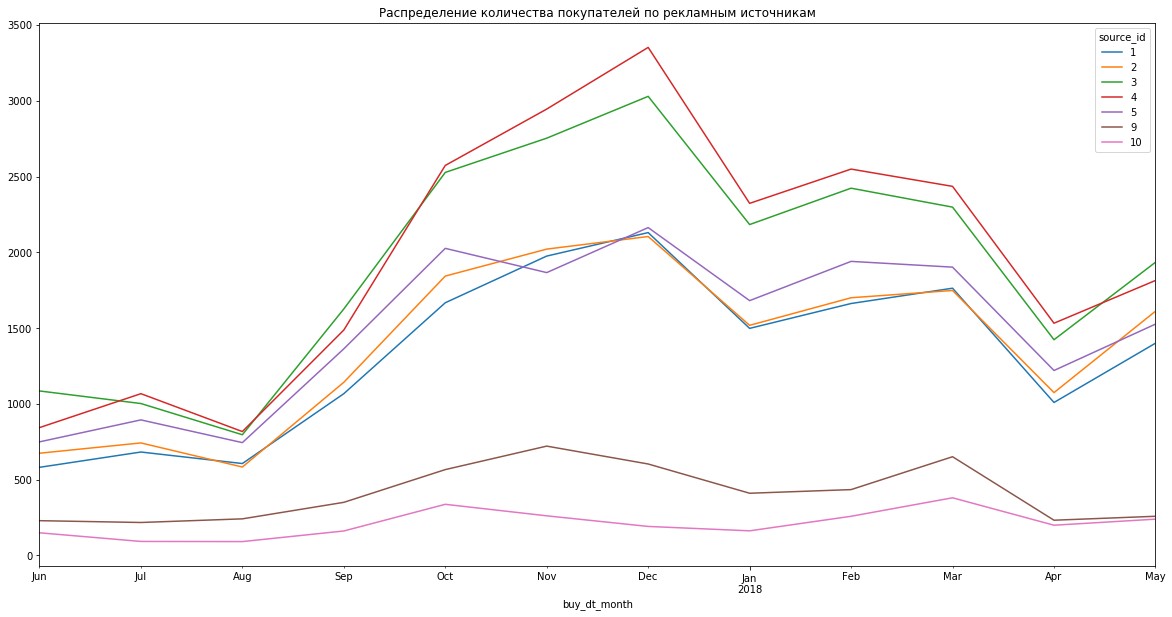

In [84]:
report_2 = []
report_2 = data_romi_final_agg.pivot_table(
        columns='source_id', 
        index='buy_dt_month', 
        values='n_buyers')
(report_2
 .plot(
     figsize = (20,10)
     , title = 'Распределение количества покупателей по рекламным источникам'
      )
)

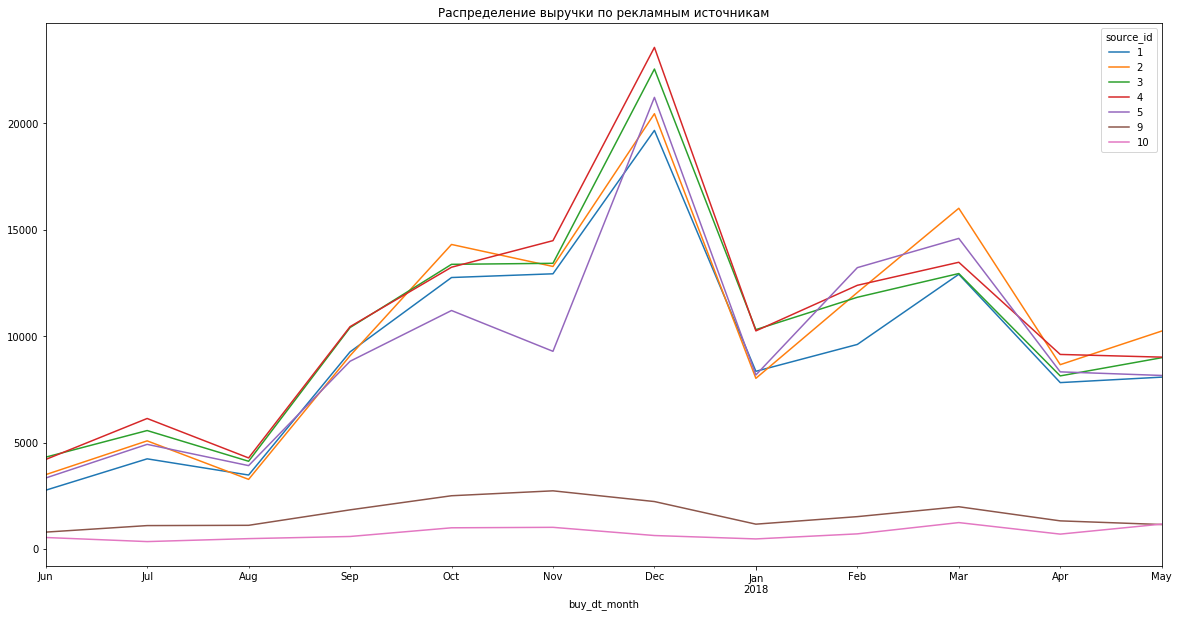

In [94]:
report_2 = []
report_2 = data_romi_final_agg.pivot_table(
        columns='source_id', 
        index='buy_dt_month', 
        values='monthly_revenue')
(report_2
 .plot(
     figsize = (20,10)
     , title = 'Распределение выручки по рекламным источникам'
      )
)

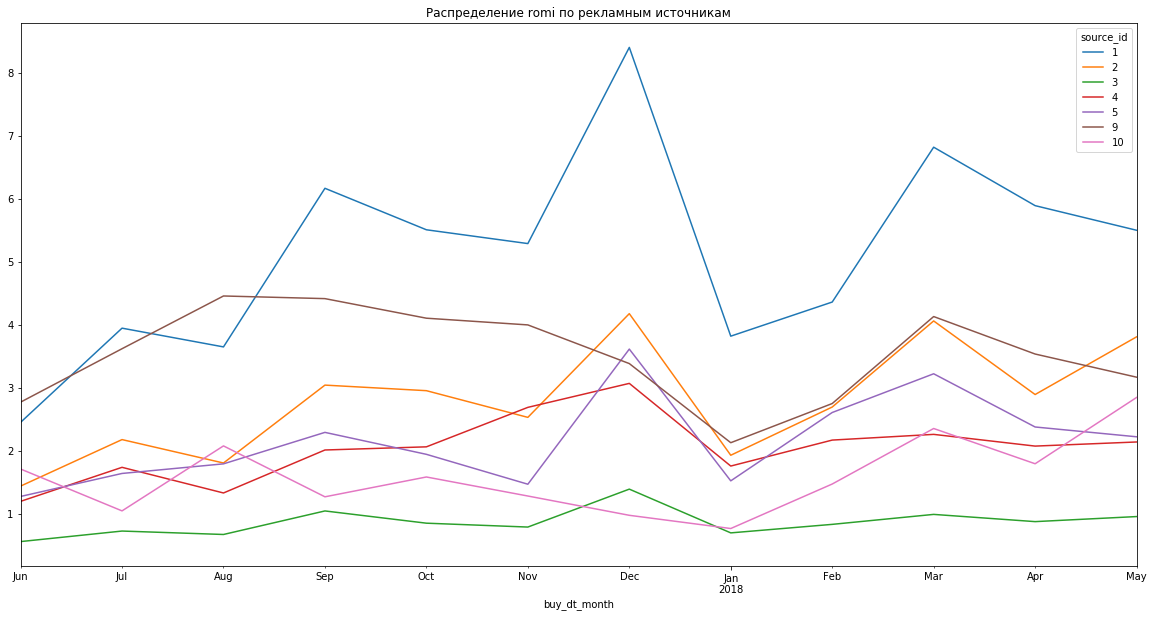

In [86]:
report_2 = []
report_2 = data_romi_final_agg.pivot_table(
        columns='source_id', 
        index='buy_dt_month', 
        values='romi'
        )
(report_2
 .plot(
     figsize = (20,10)
     , title = 'Распределение romi по рекламным источникам'
    
 )
)

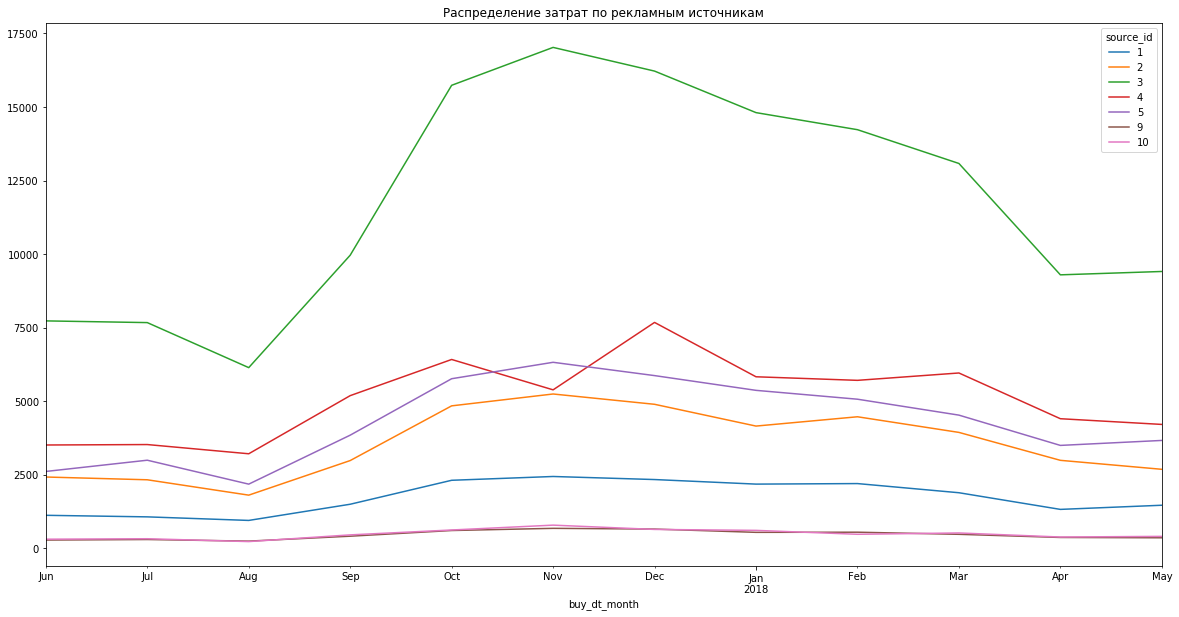

In [108]:
report_31 = []
report_31 = data_romi_final_agg.pivot_table(
        columns='source_id', 
        index='buy_dt_month', 
        values='monthly_costs',
        aggfunc = 'sum'
        )
(report_31
 .plot(
     figsize = (20,10)
     , title = 'Распределение затрат по рекламным источникам'
    
 )
)

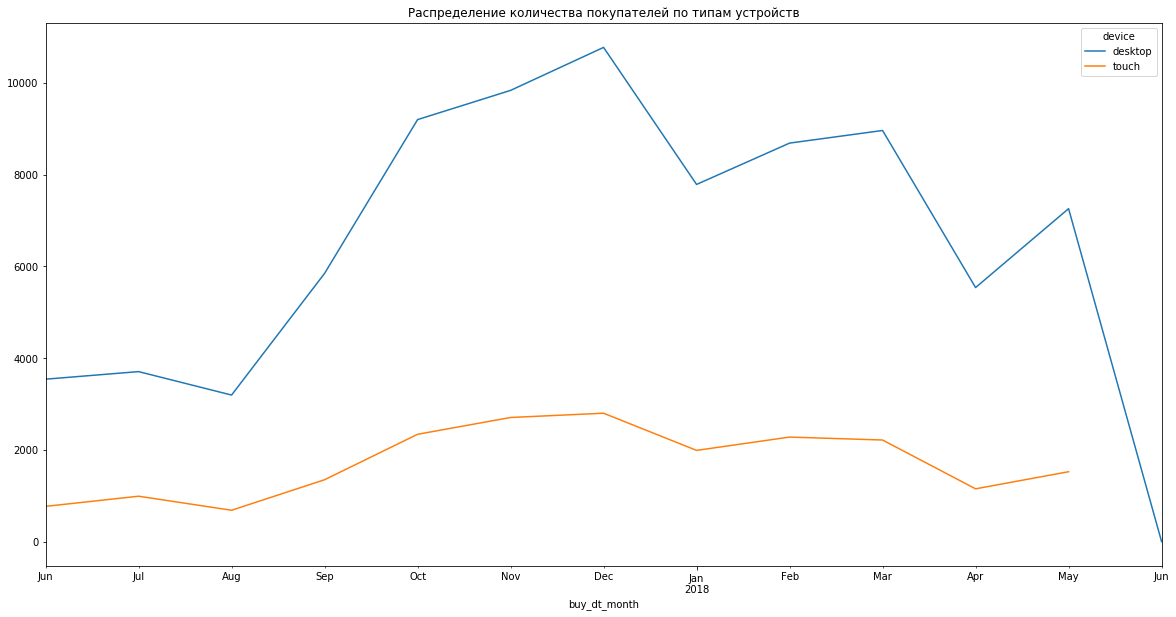

In [87]:
report_3 = []
report_3 = data_romi.pivot_table(
        columns='device', 
        index='buy_dt_month', 
        values='uid',
        aggfunc='count'
        )
(report_3
 .plot(
     figsize = (20,10)
     , title = 'Распределение количества покупателей по типам устройств'
      )
)

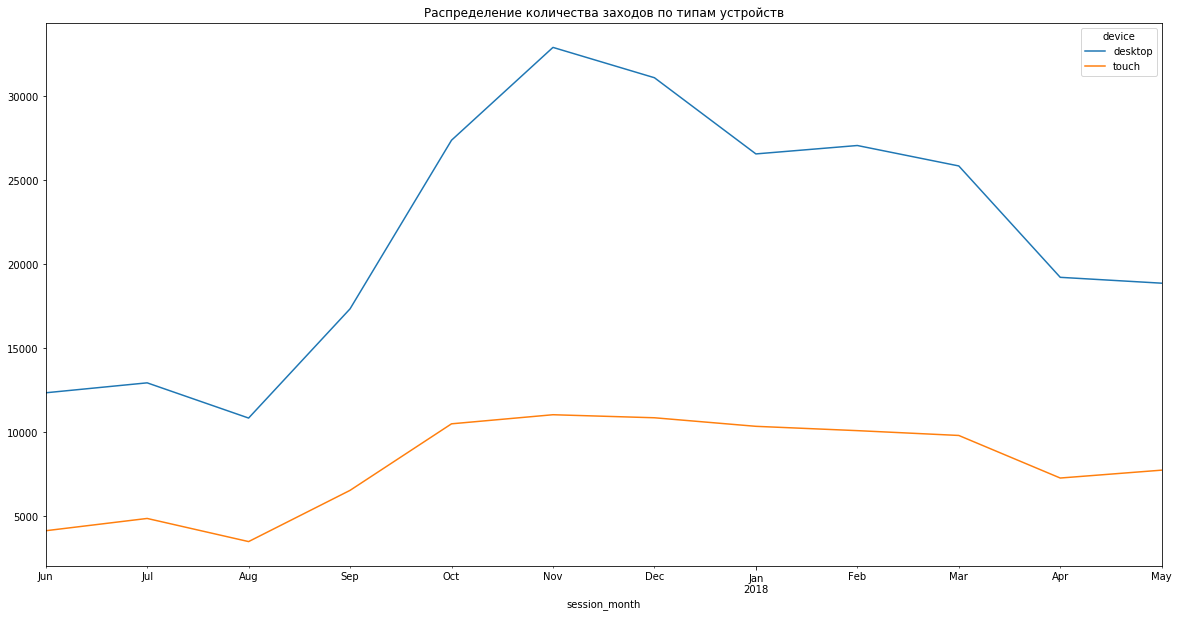

In [126]:
visits_11 = []
visits_11 = visits.pivot_table(
        columns='device', 
        index='session_month', 
        values='uid',
        aggfunc='count'
   )
(visits_11
 .plot(
     figsize = (20,10)
     , title = 'Распределение количества заходов по типам устройств'
      )
)

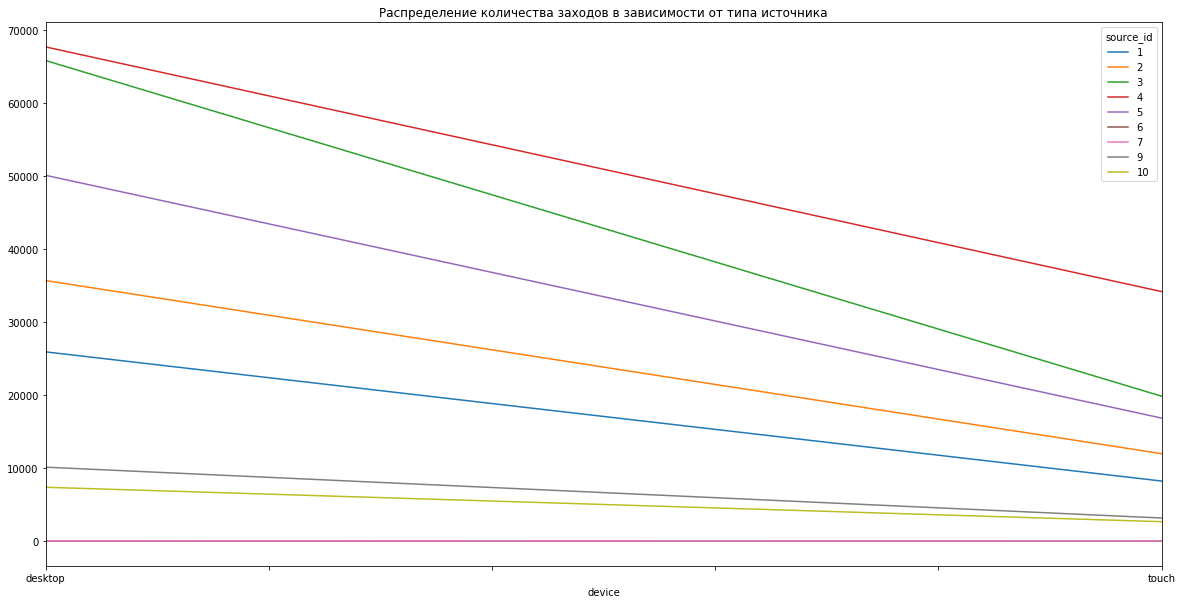

In [132]:
data333 = visits.pivot_table(
    index = 'device'
    , columns = 'source_id'
    , values = 'uid'
    , aggfunc = 'count'
)
(data333
 .plot(
     figsize = (20,10)
     , title = 'Распределение количества заходов в зависимости от типа источника'
      )
)

### Выводы по графикам:  
- Распределение количества покупателей по рекламным источникам - в лидерах 4 и 3 источник, меньше всего покупателей у 9 и 10 источника. Сезонность у всех истоникков одинковая - к новому году у всех выросло число покупателей. При это у 9 источника пик был в ноябре, у 10 в октябре. Второй пик покупок у всех источников - февраль и март (соответсвенно 23 февраля и 8 марта)  


- Распределение выручки по рекламным источникам - все источники кроме 9 и 10 показывают почти синхронную кртину. При этом, учитывая, что у 1, 2 и 5 истоников за этот же период меньше покупателей, а выручка сопоставима с лидерами 3 и 4, значит у них средний чек выше  


- Распределение romi по рекламным источникам - с точки зрения возрата инвестиций в лидерах оказались 1 и 9(!). Хорошо видно что 9 в период с августа по ноябрь показывал хорошие результаты, а в новогодние прздники, когда пик у всех остальнвх у 9 и 10 провал.  


- Распределение затрат по рекламным источникам - больше всего денег потратили на 3 источник. Видно, что траты увеличивались с авеуста по ноябрь (подготовка к НГ) далее пошел спад до апреля. В остальные источники вкладывались точно так же, но в меньшем масштабе


- Распределение количества покупателей по типам устройств - совершенно четко видно, что доля `touch` (судя по всему мобильные устройства с сенсорными экранами) в 5 раз меньше чем у стационарных компьютеров и ноутбуков. Динамика по времени такая же как и в других графиках - пик на новый год, падение в январе и небольшое колебание далее


- Распределение количества заходов по типам устройств - в целом ситуация такая же как и с покупателями.   


- Распределение количества заходов в зависимости от типа источника - тут в целом ситуция по количемсту клиентов из источников одинковая по `touch` и `desktop`

Для определения успешности канала, дополнительно введем такой параметр как отношение выручки к romi `conclusion_data`. Чем выше `conclusion_data` тем больше денег и лучше окупается канал

In [95]:
data_romi_final_agg['conclusion_data'] = data_romi_final_agg['monthly_revenue'] /data_romi_final_agg['romi']
data_romi_final_agg

,source_id,buy_dt_month,monthly_revenue,n_buyers,monthly_costs,first_buy_dt_month,cohort_lifetime,ltv,cac,romi,conclusion_data
0,1,2017-06-01,2760,581,1126,2017-06-01,0,4.750430,1.938038,2.451155,1126.0
1,2,2017-06-01,3492,674,2427,2017-06-01,0,5.181009,3.600890,1.438813,2427.0
2,3,2017-06-01,4314,1085,7732,2017-06-01,0,3.976037,7.126267,0.557941,7732.0
3,5,2017-06-01,3334,749,2616,2017-06-01,0,4.451268,3.492657,1.274465,2616.0
4,4,2017-06-01,4206,843,3515,2017-06-01,0,4.989324,4.169632,1.196586,3515.0
...,...,...,...,...,...,...,...,...,...,...,...
79,9,2018-05-01,1147,258,362,2017-06-01,11,4.445736,1.403101,3.168508,362.0
80,9,2018-04-01,1319,232,373,2017-06-01,10,5.685345,1.607759,3.536193,373.0
81,10,2017-07-01,345,92,330,2017-06-01,1,3.750000,3.586957,1.045455,330.0
82,10,2018-02-01,708,258,481,2017-06-01,8,2.744186,1.864341,1.471933,481.0


In [105]:
report_111 = []
report_111 = data_romi_final_agg.pivot_table(
        index='source_id', 
        values='conclusion_data', 
        aggfunc='mean').round(2).reset_index()
report_111.sort_values(by = 'conclusion_data', ascending=False)

,source_id,conclusion_data
2,3,11776.92
3,4,5089.42
4,5,4313.08
1,2,3567.17
0,1,1736.08
6,10,485.17
5,9,459.75


Посчитаем аггрегированные суммы затрат на источники

In [133]:
report_1111 = []
report_1111 = data_romi_final_agg.pivot_table(
        index='source_id', 
        values='monthly_costs', 
        aggfunc='sum').round(2).reset_index()
report_1111.sort_values(by = 'monthly_costs', ascending=False)

,source_id,monthly_costs
2,3,141323
3,4,61073
4,5,51757
1,2,42806
0,1,20833
6,10,5822
5,9,5517


In [138]:
report_1111[report_1111.source_id.isin([4,5,2,1])].mean()

source_id            3.00
monthly_costs    44117.25
dtype: float64

<font color='blue'> Отлично. </font>

### Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
- Маркетологам точно стоит вкладываться в продвижение мобильных приложений - т.к. покупателей в пик сезона (НГ) в мобильной версии в 5 раз меньше чем в десктопной.  


- Имеет смысл дополнительно вложится в каналы 9 и 10 - они стабильно показывают хорошую окупаемость, но приносят мало прибыли. Вложения можно увеличить в 8 раз (до среднего значения /без 3 источника и без 9 и 10/ 44117.25). К тому же пики активности по этим канал не совпадают с остальными каналами - а это значит можно увеличить доходы в разные сезоны

<font color='blue'> Проект выполнен отлично, молодец. </font>